<a href="https://colab.research.google.com/github/edoaurahman/PCVK/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Import folder yang ada di Drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


2. Import Library

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

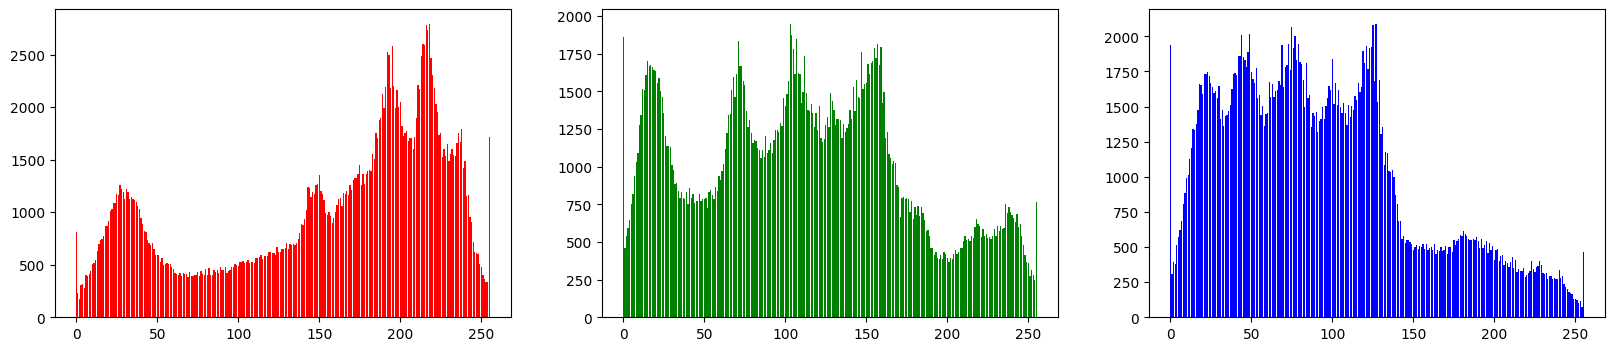

In [110]:
# Input Image
img = io.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/lena.jpg')

# hitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada

# inisialisasi array histogram
hist_r = np.zeros(256, dtype=int)
hist_g = np.zeros(256, dtype=int)
hist_b = np.zeros(256, dtype=int)

# iterasi setiap pixel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    # dapatkan nilai RGB
    r = img[y, x, 0]  # Red channel
    g = img[y, x, 1]  # Green channel
    b = img[y, x, 2]  # Blue channel

    hist_r[r] += 1
    hist_g[g] += 1
    hist_b[b] += 1

# tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), hist_r, color='r')

plt.subplot(132)
plt.bar(range(256), hist_g, color='g')

plt.subplot(133)
plt.bar(range(256), hist_b, color='b')


plt.show()


4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama? sama

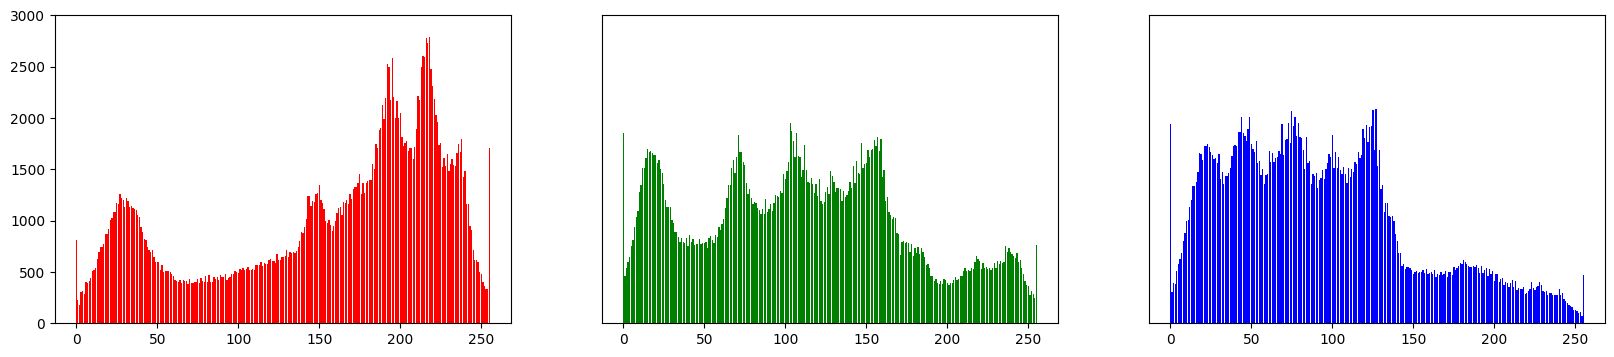

In [128]:
# membuat histogram dengan numpy
hist_r = np.histogram(img[:,:,0], 256, [0, 256])[0]
hist_g = np.histogram(img[:,:,1], 256, [0, 256])[0]
hist_b = np.histogram(img[:,:,2], 256, [0, 256])[0]

# tampilkan histogram
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), hist_r, color='r')
plt.ylim(0, 3000)

plt.subplot(132)
plt.bar(range(256), hist_g, color='g')
plt.ylim(0, 3000)
plt.yticks([])

plt.subplot(133)
plt.bar(range(256), hist_b, color='b')
plt.ylim(0, 3000)
plt.yticks([])

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

<BarContainer object of 256 artists>

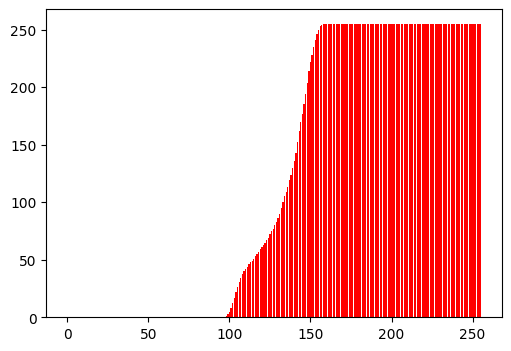

In [133]:
lena_lc = io.imread('/content/drive/MyDrive/PCVK_MM/Images/Images/lena_lc.jpg')

# Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi).
hist_r = np.zeros(256, dtype=int)
hist_g = np.zeros(256, dtype=int)
hist_b = np.zeros(256, dtype=int)

# iterasi setiap pixel
for y in range(lena_lc.shape[0]):
  for x in range(lena_lc.shape[1]):
    # dapatkan nilai
    r = lena_lc[y, x, 0]  # Red channel
    g = lena_lc[y, x, 1]  # Green channel
    b = lena_lc[y, x, 2]  # Blue channel

    hist_r[r] += 1
    hist_g[g] += 1
    hist_b[b] += 1

# Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
hist_r_cum = np.cumsum(hist_r)
hist_g_cum = np.cumsum(hist_g)
hist_b_cum = np.cumsum(hist_b)

total_pixel = lena_lc.shape[0] * lena_lc.shape[1]

hist_r_cum = hist_r_cum / total_pixel
hist_g_cum = hist_g_cum / total_pixel
hist_b_cum = hist_b_cum / total_pixel

# Normalisasi dengan kumulatif frekuensi seluruh pixel yang sudah diketahui setelah dibagi jumlah pixel
hist_r_cum = hist_r_cum * 255
hist_g_cum = hist_g_cum * 255
hist_b_cum = hist_b_cum * 255

# Implementasi rumus K0, dimana pembagian dengan nilai pixel sudah dilakukan sebelumnya (Skala warna)
hist_r_cum = np.round(hist_r_cum)
hist_g_cum = np.round(hist_g_cum)
hist_b_cum = np.round(hist_b_cum)

# Hasil Histogram Equalization
plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.bar(range(256), hist_r_cum, color='r')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!